##  Project - Bank Churn Prediction

## Objective:
    
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Context: 

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Data Description: 

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


#### GitHub:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-sannidhisiva/tree/master/NeuralNetWork

In [1]:
import statsmodels.api as statsmodel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as po
import plotly.offline as py 
from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 



In [2]:
df=pd.read_csv('bank.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
df.shape

(10000, 14)

In [4]:
df.describe().transpose()

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Data type of the columns 
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#Creating Profile Report for Analysis
#!pip install pandas_profiling
import pandas_profiling
df.profile_report()

---------------------------------------------------------------------------------------------------------------

## 1.0 Feature Elimination

In [8]:
# Loading the .csv
bank_data = df

# Eliminating unnecesary attributes
bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) 

# inplace=True to perform it over the dataset itself

bank_data.rename(columns = {'Gender':'IsMale'}, inplace=True)
bank_data.IsMale.loc[bank_data.IsMale == 'Female'] = 0       
bank_data.IsMale.loc[bank_data.IsMale == 'Male'] = 1

# Separating numerical (to normalize) and categorical variables (one-hot encoding)
num_subset = bank_data.select_dtypes('number')
cat_subset = bank_data.select_dtypes('object')

# Obtain one-hote enconded features using pd.get_dummies
cat_subset = pd.get_dummies(cat_subset)

# We save a denormalized but organized version of the dataset. This will be useful for some figures.
denorm_bank_data = pd.concat([cat_subset, num_subset], axis=1)

# Normalizing numerical variables
maxvals = num_subset.astype(float).max()                      # Finds maximum value
numericalColumns = {'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'}
for col in numericalColumns:
  num_subset[str(col)] = num_subset[str(col)]/maxvals[col]    # Divide each column (variable) by its maximum
bank_data = pd.concat([cat_subset, num_subset], axis=1)       # Concatenate both subsets

# Printing dataset types
# uint8: unsigned integer 0-255 (natural), int64: Integer (-9223372036854775808 to 9223372036854775807) float64: Double precision float
print(bank_data.dtypes)  

# Displaying a dataset head
display(bank_data.head())

# Defining X and Y
bankX = bank_data.iloc[:,:12]
bankY = bank_data.iloc[:,12:13]

X = bankX.values  # numpy array (10000, 12)
Y = bankY.values  # numpy array (10000, 1)

Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
IsMale_0               uint8
IsMale_1               uint8
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
dtype: object


Geography_France  Geography_Germany  Geography_Spain  IsMale_0  IsMale_1  \
0                 1                  0                0         1         0   
1                 0                  0                1         1         0   
2                 1                  0                0         1         0   
3                 1                  0                0         1         0   
4                 0                  0                1         1         0   

   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.728235  0.456522     0.2  0.000000           0.25          1   
1     0.715294  0.445652     0.1  0.334031           0.25          0   
2     0.590588  0.456522     0.8  0.636357           0.75          1   
3     0.822353  0.423913     0.1  0.000000           0.50          0   
4     1.000000  0.467391     0.2  0.500246           0.25          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1         0.506763       1  
1               1         0.562734       0  
2               0         0.569679       1  
3               0         0.469151       0  
4               1         0.395435       0

## 2.0 Bivariate

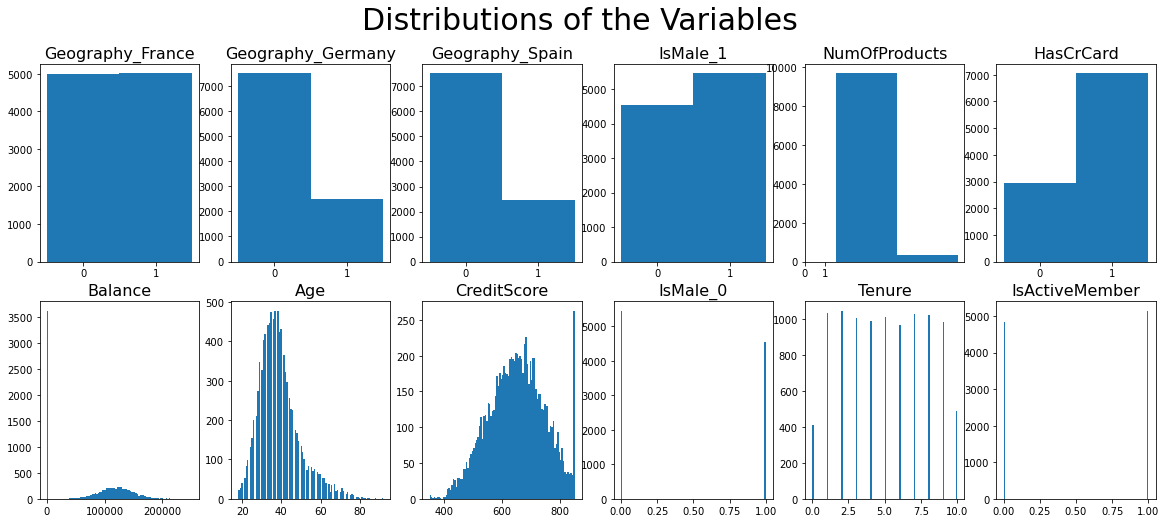

In [9]:
list_binary = [0,1,2,4,9,10]
list_normal = [3,5,6,7,8,11]
order = [0,1,2,4,9,10,8,6,5,3,7,11]

fig=plt.figure(figsize=(20,8))
for i in range(len(order)):
    xi = denorm_bank_data.values[:,order[i]]
    ax1 = fig.add_subplot(2,len(order)/2,i+1)
    plt.title(list(bank_data)[order[i]],fontsize=16)
    if i<6:
        plt.hist(xi,2)
        plt.xticks([0.25,0.75], np.arange(0, 2, 1))
    else:
        plt.hist(xi,100)
plt.suptitle('Distributions of the Variables',fontsize=30)
plt.show()

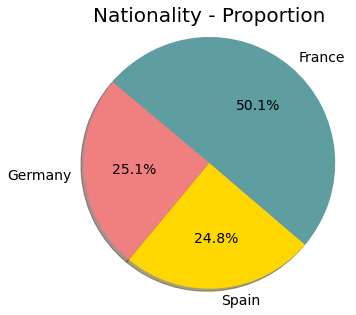

In [10]:
fig=plt.figure(figsize=(5,5))
# First, we will find how many customers each country has
Customers_France = bankX.Geography_France.sum()
Customers_Germany = bankX.Geography_Germany.sum()
Customers_Spain = bankX.Geography_Spain.sum()

# We label, color and plot our data
labels = ['Germany','Spain','France']
sizes = [Customers_Germany, Customers_Spain,Customers_France]
colors = ['lightcoral','gold', 'cadetblue']
plt.title('Nationality - Proportion', fontsize=20)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

In [11]:
testdf=df[df.Exited==0]
testdf.IsActiveMember.value_counts()

1    4416
0    3547
Name: IsActiveMember, dtype: int64

In [12]:
testdf=df[df.Exited==0]
bal0rows=testdf[testdf.Balance==0]
print(bal0rows.shape)
# cant go with this. need to impute these values. 
bal0activerows=bal0rows[bal0rows.IsActiveMember==0]
print(bal0activerows.shape)

(3117, 11)
(1424, 11)


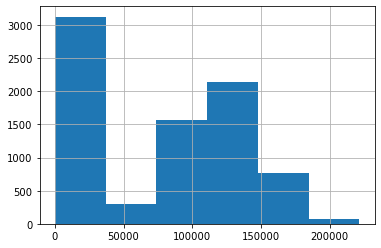

In [13]:
testdf['Balance'].hist(bins=6)

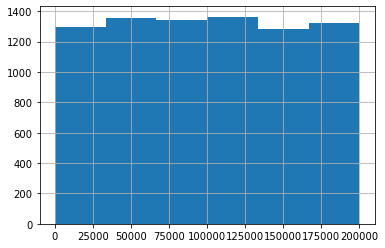

In [14]:
testdf['EstimatedSalary'].hist(bins=6)

In [15]:
testdf=df[df.Balance!=0]
testdf['balance_percent_estimatedSalary']= (testdf['Balance']/testdf['EstimatedSalary'])
testdf.head()

CreditScore Geography IsMale  Age  Tenure    Balance  NumOfProducts  \
1          608     Spain      0   41       1   83807.86              1   
2          502    France      0   42       8  159660.80              3   
4          850     Spain      0   43       2  125510.82              1   
5          645     Spain      1   44       8  113755.78              2   
7          376   Germany      0   29       4  115046.74              4   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
1          0               1        112542.58       0   
2          1               0        113931.57       1   
4          1               1         79084.10       0   
5          1               0        149756.71       1   
7          1               0        119346.88       1   

   balance_percent_estimatedSalary  
1                         0.744677  
2                         1.401375  
4                         1.587055  
5                         0.759604  
7                         0.963969

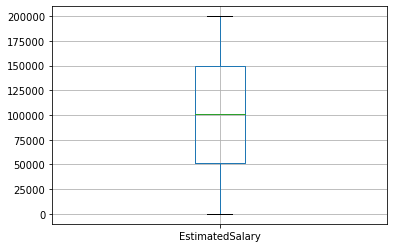

In [16]:
testdf.boxplot(column=['EstimatedSalary'])
#outier

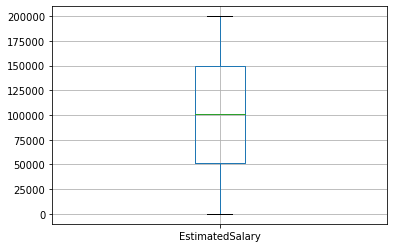

In [17]:
testdf.boxplot(column=['EstimatedSalary'])
#outier

In [18]:

df['EstimatedSalary']=np.where(df['EstimatedSalary']<25000,25000,df['EstimatedSalary'])


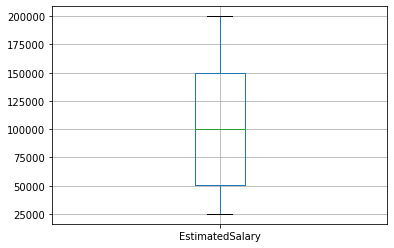

In [19]:
df.boxplot(column=['EstimatedSalary'])

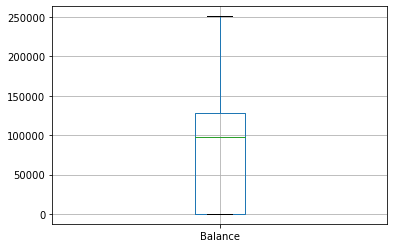

In [20]:
df.boxplot(column=['Balance'])

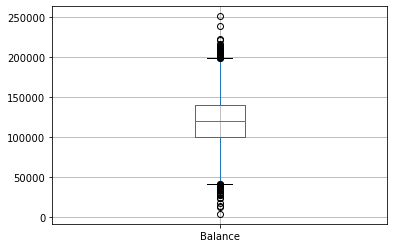

In [21]:
testdf.boxplot(column=['Balance'])


In [22]:
#dont change balance as actual figures not estimated.
#only change where balance =0 by 

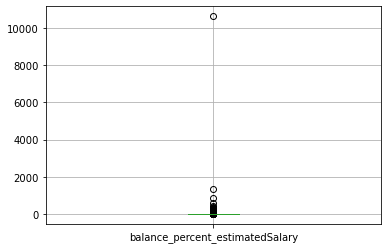

In [23]:
testdf.boxplot(column=['balance_percent_estimatedSalary'])

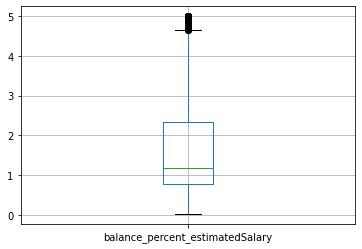

In [24]:
# 6 % values are outliers so we cap it to a lower bound = 5%
testdfbal=testdf
testdfbal['balance_percent_estimatedSalary']=np.where(testdfbal['balance_percent_estimatedSalary']>5,5,testdfbal['balance_percent_estimatedSalary'])
testdfbal.boxplot(column=['balance_percent_estimatedSalary'])

In [25]:
testdfbal['balance_percent_estimatedSalary'].mean()

1.8234554565222836

In [26]:
fil1=df['Balance']==0 
fil3=df['IsActiveMember']==1
fil2= df['Exited']==0



In [27]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    101646.055783      0.203700  
std        0.45584        0.499797     55182.457016      0.402769  
min        0.00000        0.000000     25000.000000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

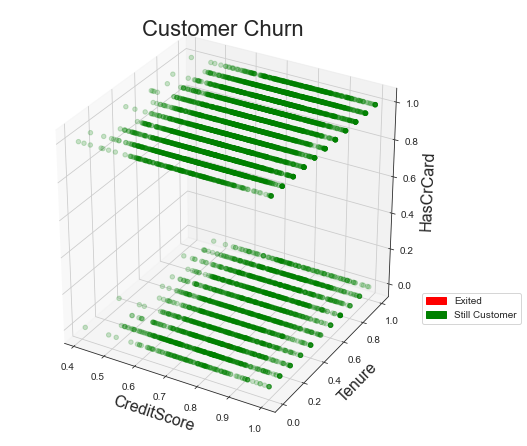

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
sns.set_style("white")
colors = ["green","red"]
alphas = [0.1,1]
colors = np.array(colors)
alphas = np.array(alphas)
churn = [int(Y[k]) for k in range(len(Y))] 
churn = np.array(churn)

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
sequence_containing_x_vals = list(range(-1000, 1000))
sequence_containing_y_vals = list(range(-1000, 1000))
sequence_containing_z_vals = list(range(-1000, 1000))

ax.scatter(X[:,5:6], X[:,7:8], X[:,10:11],color=colors[churn], alpha=0.2)
ax.set_xlabel(list(bankX)[5],fontsize=16)
ax.set_ylabel(list(bankX)[7],fontsize=16)
ax.set_zlabel(list(bankX)[10],fontsize=16)
green_patch = mpatches.Patch(color='green', label='Still Customer')
red_patch = mpatches.Patch(color='red', label='Exited')
plt.legend(handles=[red_patch,green_patch],bbox_to_anchor=(1.2,0.35))
plt.title('Customer Churn',fontsize=22)
plt.show()

In [29]:
def ClusteringCustomers(k):
    sns.set_style("white")
    clusters = KMeans(n_clusters=k).fit(CorrX)
    initial_labelled=clusters.labels_

########################################### Change of Labels #############################################
    # Old Label Basis
    basis_sum_original = clusters.cluster_centers_.sum(axis=1)
    # New Label Basis
    basis_sum_control = sorted(basis_sum_original)
    # Label Basis Transformation
    final_labelled = [basis_sum_control.index(k) for k in basis_sum_original[initial_labelled]]
##########################################################################################################
    
    # Plotting histogram of number of customers per cluster
    plt.figure()
    plt.title('Number of Customers per Cluster', fontsize=20)
    plt.hist(final_labelled,bins=range(k+1))
    plt.xticks(np.arange(0.5,k), np.arange(1, k+1, 1))
    plt.show()
    
    # Plotting actual 3D plot of the customers
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig)
    sequence_containing_x_vals = list(range(-1000, 1000))
    sequence_containing_y_vals = list(range(-1000, 1000))
    sequence_containing_z_vals = list(range(-1000, 1000))

    colors = np.array(["#033500", "#840000", "blue", "orange", 'purple', "#363737"])
    ax.scatter(CorrX[:,0], CorrX[:,1], CorrX[:,2],color=colors[final_labelled],s=20, depthshade=True, alpha=0.2)
    plt.title('Clusters of Customers - k = '+str(k),fontsize=20)
    ax.set_xlabel(list(dfCorrX)[0],fontsize=16)
    ax.set_ylabel(list(dfCorrX)[1],fontsize=16)
    ax.set_zlabel(list(dfCorrX)[2],fontsize=16)

    patches = []
    for i in range(k):
        patch = mpatches.Patch(color=colors[i], label='Cluster '+str(i))
        patches.append(patch)
    ax.legend(handles=patches,bbox_to_anchor=(1.15,0.35))
    plt.show()
    
    # Now we will predict the risk of each cluster. However, recall that in total 7963 of them remained and only 2037 exited
    # We will consider a Risk=1 (maximum) if the 2037 cases of exited clients occur in the same cluster.
    
    for p in range(k):
        ClusterExited = int(bankY[[i==p for i in final_labelled]].sum())
        TotalExited = int(bankY.sum())
        ClusterRisk = ClusterExited / TotalExited
        print('The risk ratio of Cluster',p,'is',round(ClusterRisk*100,1),'%')
        
    return

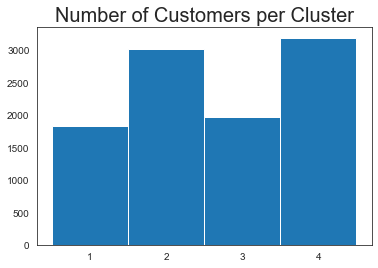

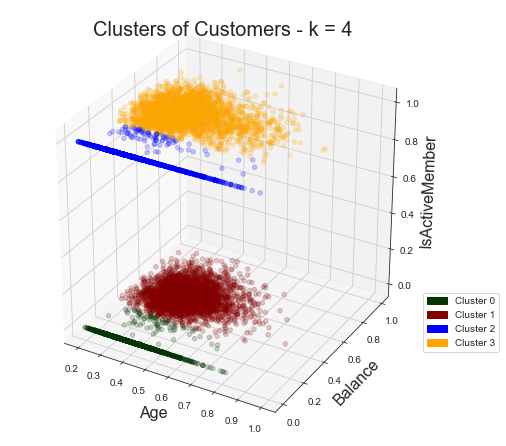

The risk ratio of Cluster 0 is 18.2 %
The risk ratio of Cluster 1 is 30.6 %
The risk ratio of Cluster 2 is 19.4 %
The risk ratio of Cluster 3 is 31.7 %


In [30]:
dfCorrX = bankX.reindex(['Age', 'Balance','IsActiveMember'], axis=1)
CorrX = dfCorrX.values

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import MaxNLocator
ClusteringCustomers(k=4)

In [31]:
#means no missing values, has 10000 values for every column, 

In [32]:
# we are diving the  data into training set and test set the ration as 70/30 format
train, test = train_test_split(df, test_size=0.3)

In [33]:
# to show there are no missing values 
df.isnull().sum()

CreditScore        0
Geography          0
IsMale             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
# visulaize the dimension of training data
df.shape

(10000, 11)

In [35]:
# check the unique values of each attribute in the training data
df.nunique()

CreditScore         460
Geography             3
IsMale                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    8784
Exited                2
dtype: int64

In [36]:
#  LET'S TRY TO VISUALIZE THE FEATURES ONE BY ONE

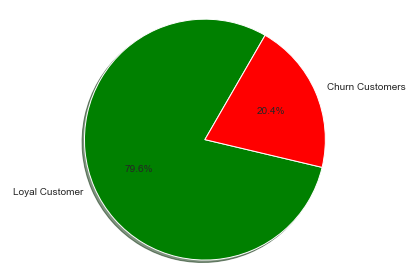

In [37]:
#No of Exited vs Active  get the percentage split figure
ExitedValues = df.Exited.value_counts()
labels = ["Loyal Customer","Churn Customers"]
colors = ['green', 'red']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()


In [38]:
#Implies dataset is imbalanced

In [39]:
#In the  bankdata we have biased distribution i.e is 80% custoemrs are loyal and 20% are not so we need to make the data set balanced

Text(0.5, 1.0, 'CreditScore')

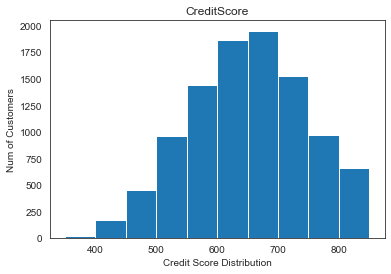

In [40]:
plt.hist(df['CreditScore'])
plt.xlabel('Credit Score Distribution')
plt.ylabel('Num of Customers')
plt.title('CreditScore')

Text(0.5, 1.0, 'Balance')

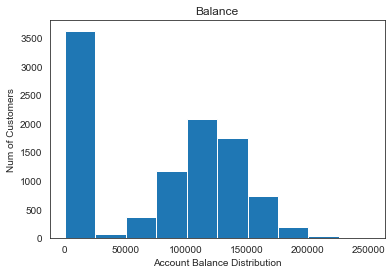

In [41]:
plt.hist(df['Balance'])
plt.xlabel('Account Balance Distribution')
plt.ylabel('Num of Customers')
plt.title('Balance')

In [42]:

df['Balance']=np.where(df['Balance']==0,(df['EstimatedSalary']*1.7),df['Balance'])

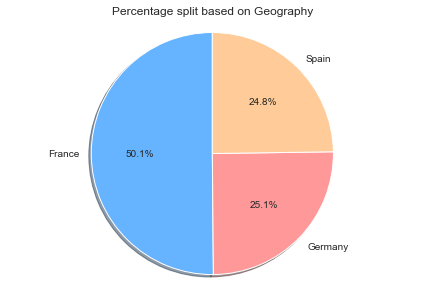

In [43]:

Geosplit = train.Geography.value_counts()
Geovalues  = df['Geography'].value_counts().values.tolist()
Geolabels  = df['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 
# Equal aspect ratio ensures that pie is drawn as a circle
f2.axis('equal')
plt.tight_layout()
plt.title('Percentage split based on Geography')
plt.show()


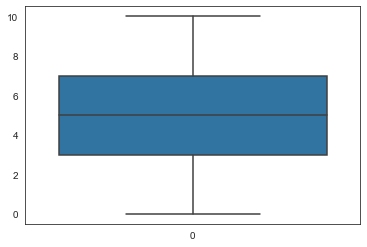

In [44]:
sns.boxplot(data= df['Tenure'], orient="v")

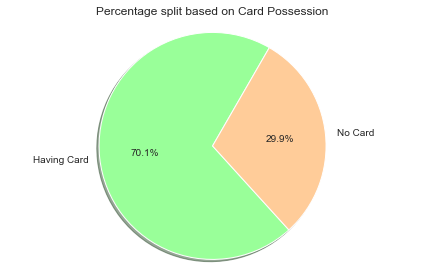

In [45]:
HasCardvalues  = train['HasCrCard'].value_counts().values.tolist()
HasCardlabels  = ["Having Card" , "No Card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f5.axis('equal')
plt.title('Percentage split based on Card Possession')
plt.tight_layout()
plt.show()

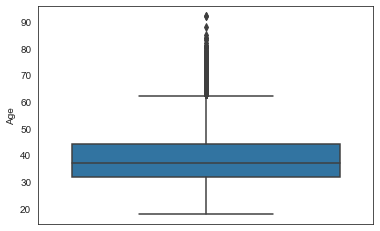

In [46]:
sns.boxplot(df['Age'] , orient = "v")

In [47]:
df[df.columns].corr()


CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842 -0.007367       0.012238   
Age                -0.003965  1.000000 -0.009997 -0.020970      -0.030680   
Tenure              0.000842 -0.009997  1.000000  0.006107       0.013444   
Balance            -0.007367 -0.020970  0.006107  1.000000       0.127298   
NumOfProducts       0.012238 -0.030680  0.013444  0.127298       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.001166       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.007728       0.009612   
EstimatedSalary    -0.002069 -0.008284  0.007170  0.507476       0.014774   
Exited             -0.027094  0.285323 -0.014001 -0.032275      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.002069 -0.027094  
Age              -0.011721        0.085472        -0.008284  0.285323  
Tenure            0.022583       -0.028362         0.007170 -0.014001  
Balance          -0.001166       -0.007728         0.507476 -0.032275  
NumOfProducts     0.003183        0.009612         0.014774 -0.047820  
HasCrCard         1.000000       -0.011866        -0.011599 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011725 -0.156128  
EstimatedSalary  -0.011599       -0.011725         1.000000  0.012226  
Exited           -0.007138       -0.156128         0.012226  1.000000

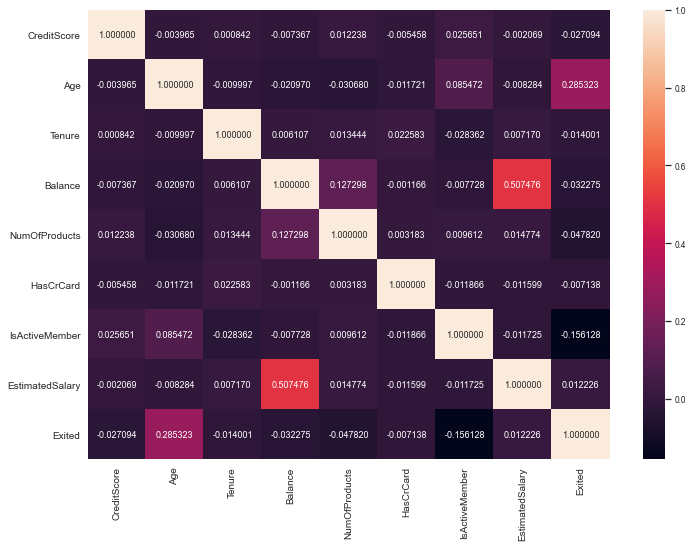

In [48]:
# generate the heatmap with the above data so that we can see what colums are corelated with the other one graphically
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(df.corr(), annot = True, fmt = ".6f")
plt.show()

There is no significant correlation among columns

In [49]:
churn     = df[df["Exited"] == 1]
not_churn = df[df["Exited"] == 0]

In [50]:
target_column = ["Exited"]
cat_columns   = df.nunique()[df.nunique() < 5].keys().tolist()

cat_columns   = [x for x in cat_columns if x not in target_column]

num_columns   = [x for x in df.columns if x not in target_column + cat_columns ]

In [51]:
def plot_visualization(column) :
    
    first = go.Pie(labels  = churn[column].value_counts().keys().tolist(),
                    values  = churn[column].value_counts().values.tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),
                    hole    = .7
                   )
    second = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),
                    domain  = dict(x = [.52,1]),
                    hole    = .7,
                    name    = "Non churn customers")
    

    layout_details = go.Layout(dict(title = column + " distribution in customer attrition ", paper_bgcolor = "rgb(243,243,243)",
             annotations = [dict(text = "churn customers",font = dict(size = 13),showarrow = False,x = .15, y = .5),
                          dict(text = "Non churn customers",font = dict(size = 13),showarrow = False,x = .88,y = .5)]
                           ))
    
    
    data = [first,second]
    
    
    fig  = go.Figure(data = data,layout = layout_details)
    
    py.iplot(fig)

In [52]:
# Calling the function for plotting the pie plot for geography column
plot_visualization(cat_columns[0])

In [53]:
def hist_visulalization(column) :
    first = go.Histogram(x  = churn[column],histnorm= "percent",name = "Churn Customers",
                          marker = dict(line = dict(width = .5,color = "black")),opacity = .9 ) 
    
    second = go.Histogram(x  = not_churn[column],histnorm = "percent",name = "Non churn customers",
                          marker = dict(line = dict(width = .5,color = "black")),opacity = .9)
    
    data = [first,second]
    layout_details = go.Layout(dict(title =column + " distribution in customer attrition ",
                            
                                    paper_bgcolor = "rgb(243,243,243)",
                                    plot_bgcolor  = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(256, 256, 256)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           ))
    fig  = go.Figure(data=data,layout=layout_details)
    
    py.iplot(fig)

In [54]:
hist_visulalization(num_columns[1])
# as we deal with elder customers (in terms of age) their is a risk of losing them,

In [55]:
#plotting the pie plot for gender column
plot_visualization(cat_columns[1])

In [56]:
# Calling the function for plotting the histogram for tenure column 
hist_visulalization(num_columns[2])

In [57]:
#   plotting the pie plot for gender column
#  70% of the people who leave,  do not
plot_visualization(cat_columns[3])

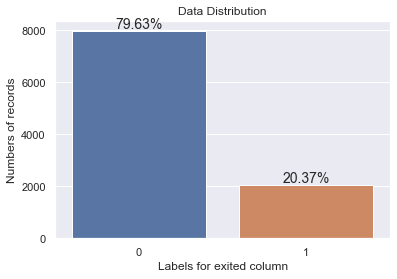

In [58]:
# Graphical representation of the target label percentage before upsampling
total_len = len(df['Exited'])
sns.set()
sns.countplot(df.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

In [59]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [60]:
from sklearn.utils import resample

In [61]:
#upsampling minority class to match to majority class
df_majority = df[df.Exited==0]
df_minority = df[df.Exited==1]
df_minority_upsampled = resample(df_minority, replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [62]:
df_upsampled.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

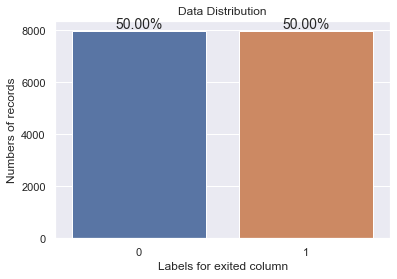

In [63]:
# Graphical representation of the target label percentage after balancing minority class
total_len = len(df_upsampled['Exited'])
sns.set()
sns.countplot(df_upsampled.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

In [64]:
df_new = df_upsampled

In [65]:
df_new.dtypes

CreditScore          int64
Geography           object
IsMale              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [66]:
df_new=pd.get_dummies(df_new,drop_first=True)

In [67]:
df_new.head()

CreditScore  Age  Tenure     Balance  NumOfProducts  HasCrCard  \
1          608   41       1   83807.860              1          0   
3          699   39       1  159505.271              2          0   
4          850   43       2  125510.820              1          1   
6          822   50       7   42500.000              2          1   
8          501   44       4  142051.070              2          0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
1               1        112542.58       0                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   
6               1         25000.00       0                  0   
8               1         74940.50       0                  0   

   Geography_Spain  IsMale_1  
1                1         0  
3                0         0  
4                1         0  
6                0         1  
8                0         1

In [68]:
df_new.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'IsMale_1'],
      dtype='object')

In [69]:
df_ex_ai=df_new

In [70]:
scale_down_column=pd.DataFrame(df_new[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [71]:
for col in scale_down_column.columns:
    scale_down_column[col]=scale_down_column[col].astype('float64')

In [72]:
scale_down_column.dtypes

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
dtype: object

In [73]:
type(scale_down_column)

pandas.core.frame.DataFrame

In [74]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

scalar.fit(scale_down_column)
scale_down_column1=scalar.transform(scale_down_column)

scaled_df = pd.DataFrame(scale_down_column1, columns=scale_down_column.columns)
scaled_df.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary
0        0.516  0.310811     0.1  0.238057       0.000000         0.500265
1        0.698  0.283784     0.1  0.463200       0.333333         0.393312
2        1.000  0.337838     0.2  0.362092       0.000000         0.309065
3        0.944  0.432432     0.7  0.115197       0.333333         0.000000
4        0.302  0.351351     0.4  0.411287       0.333333         0.285387

In [75]:
scaled_df.shape

(15926, 6)

In [76]:
scaled_df=scaled_df.reset_index(drop=True)
scaled_df.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary
0        0.516  0.310811     0.1  0.238057       0.000000         0.500265
1        0.698  0.283784     0.1  0.463200       0.333333         0.393312
2        1.000  0.337838     0.2  0.362092       0.000000         0.309065
3        0.944  0.432432     0.7  0.115197       0.333333         0.000000
4        0.302  0.351351     0.4  0.411287       0.333333         0.285387

-----------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

##  3.0 Data Split

##  3.1 Normalize the train and test data

In [77]:
df = pd.read_csv('bank.csv')

In [78]:
x = df.iloc[:,3:-1].values
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [79]:
y = df.iloc[:,-1].values
print(y)

[1 0 1 ... 1 1 0]


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [83]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4.0 Initialize & build the model. Identify the points of improvement and implement the same. 

In [84]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
219/219 [==============================] - 0s 616us/step - loss: 0.5859 - accuracy: 0.7150
Epoch 2/100
219/219 [==============================] - 0s 669us/step - loss: 0.4906 - accuracy: 0.7977
Epoch 3/100
219/219 [==============================] - 0s 634us/step - loss: 0.4612 - accuracy: 0.7977
Epoch 4/100
219/219 [==============================] - 0s 619us/step - loss: 0.4470 - accuracy: 0.7977
Epoch 5/100
219/219 [==============================] - 0s 639us/step - loss: 0.4386 - accuracy: 0.7977
Epoch 6/100
219/219 [==============================] - 0s 587us/step - loss: 0.4335 - accuracy: 0.7977
Epoch 7/100
219/219 [==============================] - 0s 628us/step - loss: 0.4303 - accuracy: 0.7979
Epoch 8/100
219/219 [==============================] - 0s 624us/step - loss: 0.4277 - accuracy: 0.7993
Epoch 9/100
219/219 [==============================] - 0s 670us/step - loss: 0.4256 - accuracy: 0.8024
Epoch 10/100
219/219 [==============================] - 0s 596us/step - l

219/219 [==============================] - 0s 648us/step - loss: 0.3320 - accuracy: 0.8649
Epoch 80/100
219/219 [==============================] - 0s 578us/step - loss: 0.3316 - accuracy: 0.8636
Epoch 81/100
219/219 [==============================] - 0s 583us/step - loss: 0.3314 - accuracy: 0.8650
Epoch 82/100
219/219 [==============================] - 0s 574us/step - loss: 0.3313 - accuracy: 0.8634
Epoch 83/100
219/219 [==============================] - 0s 601us/step - loss: 0.3318 - accuracy: 0.8636
Epoch 84/100
219/219 [==============================] - 0s 628us/step - loss: 0.3316 - accuracy: 0.8649
Epoch 85/100
219/219 [==============================] - 0s 569us/step - loss: 0.3317 - accuracy: 0.8649
Epoch 86/100
219/219 [==============================] - 0s 546us/step - loss: 0.3314 - accuracy: 0.8643
Epoch 87/100
219/219 [==============================] - 0s 538us/step - loss: 0.3315 - accuracy: 0.8649
Epoch 88/100
219/219 [==============================] - 0s 615us/step - loss:

In [85]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2243  136]
 [ 295  326]]


0.8563333333333333

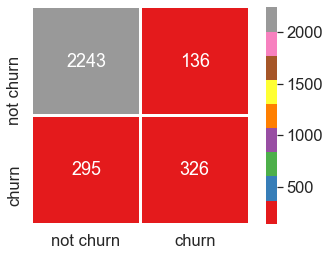

In [87]:
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test.astype('int'), y_pred.astype('int'))
sn.heatmap(conf_matrix,annot=True,fmt = 'd',square = True,
 xticklabels=['not churn','churn'],
 yticklabels=['not churn','churn'],
 linewidths = 2,linecolor = 'w',cmap = 'Set1')
plt.subplots_adjust(wspace = .3,hspace = .3)

--------------------------------------------------------------------------------------------------------

## With DIfferent optimizer & epochs

In [88]:
df = pd.read_csv('bank.csv')
# Dropping unique columns not impacting the outcome
df.drop(['RowNumber','CustomerId', 'Surname'], axis = 1, inplace = True)

In [89]:
df_new = pd.get_dummies(df, columns=['Geography'],drop_first = True)

In [90]:
df_new.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  Female   42       2       0.00              1          1   
1          608  Female   41       1   83807.86              1          0   
2          502  Female   42       8  159660.80              3          1   
3          699  Female   39       1       0.00              2          0   
4          850  Female   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1                  0                0  
1               1        112542.58       0                  0                1  
2               0        113931.57       1                  0                0  
3               0         93826.63       0                  0                0  
4               1         79084.10       0                  0                1

In [91]:
# Covert Gender column values to 1 or 0 for male and female
mf = lambda x : 1 if x == 'Male' else 0
bank_churn_mod1_df = df_new.copy(deep = True)
bank_churn_mod1_df['Gender'] = df_new['Gender'].apply(mf)
bank_churn_mod1_df.head(10)

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   
5          645       1   44       8  113755.78              2          1   
6          822       1   50       7       0.00              2          1   
7          376       0   29       4  115046.74              4          1   
8          501       1   44       4  142051.07              2          0   
9          684       1   27       2  134603.88              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1                  0                0  
1               1        112542.58       0                  0                1  
2               0        113931.57       1                  0                0  
3               0         93826.63       0                  0                0  
4               1         79084.10       0                  0                1  
5               0        149756.71       1                  0                1  
6               1         10062.80       0                  0                0  
7               0        119346.88       1                  1                0  
8               1         74940.50       0                  0                0  
9               1         71725.73       0                  0                0

In [92]:
# Split the data into Train and Test sets
from sklearn.model_selection import train_test_split
X = bank_churn_mod1_df.drop('Exited', axis=1)
y = bank_churn_mod1_df.Exited
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(y_test)

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
5273    0
8014    0
8984    0
6498    0
6327    0
Name: Exited, Length: 3000, dtype: int64


In [93]:
bank_churn_mod1_df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [94]:
y_train.value_counts(normalize=True)

0    0.798571
1    0.201429
Name: Exited, dtype: float64

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = StandardScaler()
Xtrain_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
Xtest_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [96]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import math
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn import metrics
from tensorflow.keras import Input

def draw_cm(ytest, predicty):
    cm=metrics.confusion_matrix(ytest, predicty, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    print(df_cm.T)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm.T, annot=True, fmt ='d')

    print( "RECALL SCORE = %f" % recall_score(y_test,predicty))
    print( "PRECISION SCORE = %f" % precision_score(y_test,predicty))
    return(df_cm)

def print_conf_summary(df_cm) :
    print("The confusion matrix")
    print("True Positives (TP): we correctly predicted that customers will leave : {0}".format(df_cm["Predict 1"][0]))
    print("True Negatives (TN): we correctly predicted that customers will not leave : {0}".format(df_cm["Predict 0"][1]))
    print("False Positives (FP): Predicted they will leave but did not leave : {0}".format(df_cm["Predict 1"][1]))
    print("False Negatives (FN):  Predicted they will not leave but left : {0}".format(df_cm["Predict 0"][0]))

In [97]:
def create_and_run_model(Xtr, ytr, Xte, yte, hidden_layers = 2) :

  global batch_size_no
  global epoch_no
  global optim
  ncols = Xtrain_scaled.shape[1]
  model = Sequential()
  hid_activation = 'relu'
  final_activation = 'sigmoid'
  model.add(Input(shape = (ncols,)))
 
  if (hidden_layers >=1) :
    # Add the first hidden layer 
    hl_neurons = math.floor(ncols * 0.90)
    print(hl_neurons)
    model.add(Dense( hl_neurons, activation=hid_activation))

    if (hidden_layers >=2 ) :
      # second hidden layer
      hl_neurons = math.floor(hl_neurons * 0.70)
      print(hl_neurons)
      model.add(Dense(hl_neurons, activation=hid_activation))
      if (hidden_layers >=3 ) :
        # third hidden layer
        hl_neurons = math.floor(hl_neurons * 0.70)
        print(hl_neurons)
        model.add(Dense(hl_neurons, activation=hid_activation))

  # Add an output layer with one neuron
  model.add(Dense(1, activation = final_activation))
  #optim = optimizers.Adam(lr = 0.001)
  model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics=['accuracy'])  #metrics = accuracy / mse, optimizer = /  
  model.fit(Xtr, ytr.values, batch_size = batch_size_no, epochs = epoch_no, verbose = 0)
  results = model.evaluate(Xte, yte.values, verbose=0)
  print(model.metrics_names)
  print(results)
  predicted_y = model.predict(Xte)
  predicted_y = predicted_y > 0.5
  print(model.summary())
  df_cm = draw_cm(yte,predicted_y)
  print_conf_summary(df_cm)
  return (model, predicted_y)

9
['loss', 'accuracy']
[0.349979966878891, 0.8576666712760925]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 108       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
             1     0
Predict 1  263    63
Predict 0  364  2310
RECALL SCORE = 0.419458
PRECISION SCORE = 0.806748
The confusion matrix
True Positives (TP): we correctly predicted that customers will leave : 263
True Negatives (TN): we correctly predicted that customers will not leave : 2310
False Positives (FP): Predicted they will leave but did not leave : 63
False Negatives (FN):  Predicted they will not leave but left : 364


Optimizer  HiddenLayers  Epochs  BatchSize     Loss  Accuracy    Recall  \
0      Adam             1      10          5  0.34998  0.857667  0.419458   

   Precision  
0   0.806748

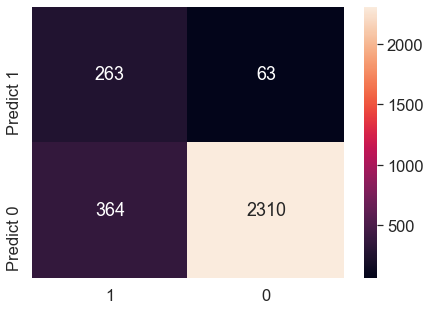

In [98]:
batch_size_no = 5
epoch_no = 10
np.random.seed(100)
optim = optimizers.Adam(lr = 0.001)
optimName = 'Adam'
hl = 1
model, ypredict = create_and_run_model(Xtrain_scaled, y_train, Xtest_scaled, y_test,hidden_layers = hl)

reportN =  pd.DataFrame([[optimName, hl,epoch_no,batch_size_no,model.evaluate(Xtest_scaled, y_test.values,verbose=0)[0],
                          model.evaluate(Xtest_scaled, y_test.values,verbose=0)[1],recall_score(y_test,ypredict),
                          precision_score(y_test,ypredict)]],
                        columns=['Optimizer', 'HiddenLayers','Epochs', 'BatchSize','Loss', 'Accuracy', 'Recall', 'Precision'])
report =reportN
report.drop_duplicates(inplace=True)
report

batch_size_no = 5
epoch_no = 10
np.random.seed(100)
optim = optimizers.SGD(lr = 0.001)
optimName = 'SGD'
hl = 1
model, ypredict = create_and_run_model(Xtrain_scaled, y_train, Xtest_scaled, y_test,hidden_layers = hl)
reportN =  pd.DataFrame([[optimName, hl,epoch_no,batch_size_no,model.evaluate(Xtest_scaled, y_test.values,verbose=0)[0],
                          model.evaluate(Xtest_scaled, y_test.values,verbose=0)[1],recall_score(y_test,ypredict),
                          precision_score(y_test,ypredict)]],
                        columns=['Optimizer', 'HiddenLayers','Epochs', 'BatchSize','Loss', 'Accuracy', 'Recall', 'Precision'])
report = report.append(reportN, ignore_index=True)
report.drop_duplicates(inplace=True)
report

9
['loss', 'accuracy']
[0.34560903906822205, 0.862333357334137]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 9)                 108       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
             1     0
Predict 1  328   114
Predict 0  299  2259
RECALL SCORE = 0.523126
PRECISION SCORE = 0.742081
The confusion matrix
True Positives (TP): we correctly predicted that customers will leave : 328
True Negatives (TN): we correctly predicted that customers will not leave : 2259
False Positives (FP): Predicted they will leave but did not leave : 114
False Negatives (FN):  Predicted they will not leave but left : 299


Optimizer  HiddenLayers  Epochs  BatchSize      Loss  Accuracy    Recall  \
0      Adam             1      10          5  0.349980  0.857667  0.419458   
1      Adam             1      20          5  0.345609  0.862333  0.523126   

   Precision  
0   0.806748  
1   0.742081

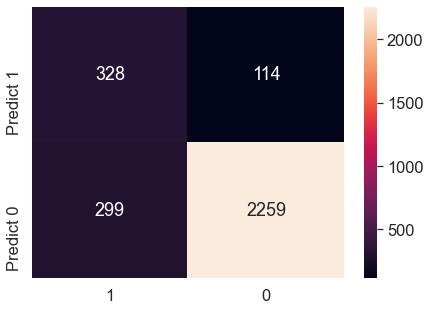

In [99]:
batch_size_no = 5
epoch_no = 20
np.random.seed(100)
optim = optimizers.Adam(lr = 0.001)
optimName = 'Adam'
hl = 1
model, ypredict = create_and_run_model(Xtrain_scaled, y_train, Xtest_scaled, y_test,hidden_layers = hl)
reportN =  pd.DataFrame([[optimName, hl,epoch_no,batch_size_no,model.evaluate(Xtest_scaled, y_test.values,verbose=0)[0],
                          model.evaluate(Xtest_scaled, y_test.values,verbose=0)[1],recall_score(y_test,ypredict),
                          precision_score(y_test,ypredict)]],
                        columns=['Optimizer', 'HiddenLayers','Epochs', 'BatchSize','Loss', 'Accuracy', 'Recall', 'Precision'])
report = report.append(reportN, ignore_index=True)
report.drop_duplicates(inplace=True)
report

9
6
['loss', 'accuracy']
[0.3406399190425873, 0.8633333444595337]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 9)                 108       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________
None
             1     0
Predict 1  313    96
Predict 0  314  2277
RECALL SCORE = 0.499203
PRECISION SCORE = 0.765281
The confusion matrix
True Positives (TP): we correctly predicted that customers will leave : 313
True Negatives (TN): we correctly predicted that customers will not leave : 2277
False Positives (FP): P

Optimizer  HiddenLayers  Epochs  BatchSize      Loss  Accuracy    Recall  \
0      Adam             1      10          5  0.349980  0.857667  0.419458   
1      Adam             1      20          5  0.345609  0.862333  0.523126   
2      Adam             2      20          5  0.340640  0.863333  0.499203   

   Precision  
0   0.806748  
1   0.742081  
2   0.765281

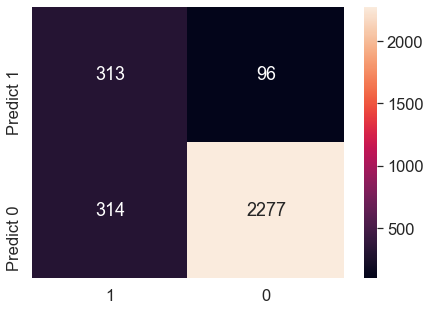

In [100]:
batch_size_no = 5
epoch_no = 20
np.random.seed(100)
optim = optimizers.Adam(lr = 0.001)
optimName = 'Adam'
hl = 2
model, ypredict = create_and_run_model(Xtrain_scaled, y_train, Xtest_scaled, y_test,hidden_layers = hl)
reportN =  pd.DataFrame([[optimName, hl,epoch_no,batch_size_no,model.evaluate(Xtest_scaled, y_test.values,verbose=0)[0],
                          model.evaluate(Xtest_scaled, y_test.values,verbose=0)[1],recall_score(y_test,ypredict),
                          precision_score(y_test,ypredict)]],
                        columns=['Optimizer', 'HiddenLayers','Epochs', 'BatchSize','Loss', 'Accuracy', 'Recall', 'Precision'])
report = report.append(reportN, ignore_index=True)
report.drop_duplicates(inplace=True)
report

9
6
4
['loss', 'accuracy']
[0.346131294965744, 0.8600000143051147]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
None
             1     0
Predict 1  286    79
Predict 0  341  2294
RECALL SCORE = 0.456140
PRECISION SCORE = 0.783562
The confusion matrix
True Positives (TP): we correctly predicted tha

Optimizer  HiddenLayers  Epochs  BatchSize      Loss  Accuracy    Recall  \
0      Adam             1      10          5  0.349980  0.857667  0.419458   
1      Adam             1      20          5  0.345609  0.862333  0.523126   
2      Adam             2      20          5  0.340640  0.863333  0.499203   
3      Adam             3      20          5  0.346131  0.860000  0.456140   

   Precision  
0   0.806748  
1   0.742081  
2   0.765281  
3   0.783562

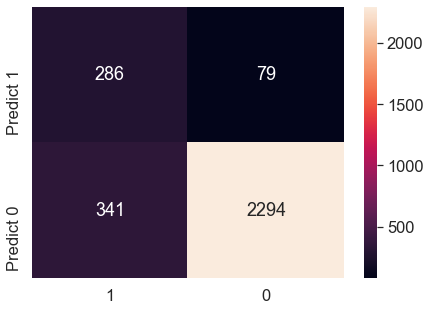

In [101]:
batch_size_no = 5
epoch_no = 20
np.random.seed(100)
optim = optimizers.Adam(lr = 0.001)
optimName = 'Adam'
hl = 3
model, ypredict = create_and_run_model(Xtrain_scaled, y_train, Xtest_scaled, y_test,hidden_layers = hl)
reportN =  pd.DataFrame([[optimName, hl,epoch_no,batch_size_no,model.evaluate(Xtest_scaled, y_test.values,verbose=0)[0],
                          model.evaluate(Xtest_scaled, y_test.values,verbose=0)[1],recall_score(y_test,ypredict),
                          precision_score(y_test,ypredict)]],
                        columns=['Optimizer', 'HiddenLayers','Epochs', 'BatchSize','Loss', 'Accuracy', 'Recall', 'Precision'])
report = report.append(reportN, ignore_index=True)
report.drop_duplicates(inplace=True)
report

9
6
4
['loss', 'accuracy']
[0.3482326567173004, 0.8610000014305115]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
None
             1     0
Predict 1  296    86
Predict 0  331  2287
RECALL SCORE = 0.472089
PRECISION SCORE = 0.774869
The confusion matrix
True Positives (TP): we correctly predicted th

Optimizer  HiddenLayers  Epochs  BatchSize      Loss  Accuracy    Recall  \
0      Adam             1      10          5  0.349980  0.857667  0.419458   
1      Adam             1      20          5  0.345609  0.862333  0.523126   
2      Adam             2      20          5  0.340640  0.863333  0.499203   
3      Adam             3      20          5  0.346131  0.860000  0.456140   
4      Adam             4     500         10  0.348233  0.861000  0.472089   

   Precision  
0   0.806748  
1   0.742081  
2   0.765281  
3   0.783562  
4   0.774869

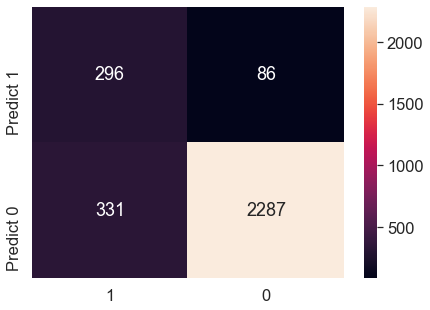

In [102]:
batch_size_no = 10
epoch_no = 500
np.random.seed(100)
optim = optimizers.Adam(lr = 0.001)
optimName = 'Adam'
hl = 4
model, ypredict = create_and_run_model(Xtrain_scaled, y_train, Xtest_scaled, y_test,hidden_layers = hl)
reportN =  pd.DataFrame([[optimName, hl,epoch_no,batch_size_no,model.evaluate(Xtest_scaled, y_test.values,verbose=0)[0],
                          model.evaluate(Xtest_scaled, y_test.values,verbose=0)[1],recall_score(y_test,ypredict),
                          precision_score(y_test,ypredict)]],
                        columns=['Optimizer', 'HiddenLayers','Epochs', 'BatchSize','Loss', 'Accuracy', 'Recall', 'Precision'])
report = report.append(reportN, ignore_index=True)
report.drop_duplicates(inplace=True)
report

9
['loss', 'accuracy']
[0.43903911113739014, 0.8023333549499512]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
             1     0
Predict 1   71    37
Predict 0  556  2336
RECALL SCORE = 0.113238
PRECISION SCORE = 0.657407
The confusion matrix
True Positives (TP): we correctly predicted that customers will leave : 71
True Negatives (TN): we correctly predicted that customers will not leave : 2336
False Positives (FP): Predicted they will leave but did not leave : 37
False Negatives (FN):  Predicted they will not leave but left : 556


Optimizer  HiddenLayers  Epochs  BatchSize      Loss  Accuracy    Recall  \
0      Adam             1      10          5  0.349980  0.857667  0.419458   
1      Adam             1      20          5  0.345609  0.862333  0.523126   
2      Adam             2      20          5  0.340640  0.863333  0.499203   
3      Adam             3      20          5  0.346131  0.860000  0.456140   
4      Adam             4     500         10  0.348233  0.861000  0.472089   
5       SGD             1      10          5  0.439039  0.802333  0.113238   

   Precision  
0   0.806748  
1   0.742081  
2   0.765281  
3   0.783562  
4   0.774869  
5   0.657407

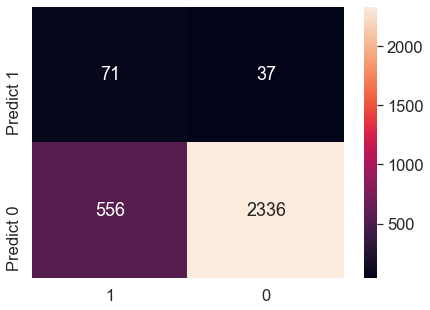

In [103]:
batch_size_no = 5
epoch_no = 10
np.random.seed(100)
optim = optimizers.SGD(lr = 0.001)
optimName = 'SGD'
hl = 1
model, ypredict = create_and_run_model(Xtrain_scaled, y_train, Xtest_scaled, y_test,hidden_layers = hl)
reportN =  pd.DataFrame([[optimName, hl,epoch_no,batch_size_no,model.evaluate(Xtest_scaled, y_test.values,verbose=0)[0],
                          model.evaluate(Xtest_scaled, y_test.values,verbose=0)[1],recall_score(y_test,ypredict),
                          precision_score(y_test,ypredict)]],
                        columns=['Optimizer', 'HiddenLayers','Epochs', 'BatchSize','Loss', 'Accuracy', 'Recall', 'Precision'])
report = report.append(reportN, ignore_index=True)
report.drop_duplicates(inplace=True)
report

## Model Performance Evaluation

----------------------------------------------------

#### Model Performs with around 86 % Accuracy and Recall of 50 %

### Once customer clusters are analyzed ,business can take decisions to provide personalized offers to retain customers and save revenue as well as customer worth. 

### Adam and SGD tried and Adam providing better results.

As RecallScore less than 50 % ,it means data is imbalanced and it requires more data for modeling.We can generate more data with oversamping and try with model creation